In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('kddcup99_csv.csv')

In [3]:
df.shape

(494020, 42)

In [4]:
list(df)

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'lnum_compromised',
 'lroot_shell',
 'lsu_attempted',
 'lnum_root',
 'lnum_file_creations',
 'lnum_shells',
 'lnum_access_files',
 'lnum_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'label']

In [5]:
# df["service"].value_counts()

In [6]:
num_feature = ['duration',
 'protocol_type',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'label']

In [7]:
# num_feature = ['duration',
#  'protocol_type',
#  'src_bytes',
#  'dst_bytes',
#  'wrong_fragment',
#  'urgent',
#  'num_failed_logins',
#  'lnum_compromised',
#  'lroot_shell',
#  'lsu_attempted',
#  'lnum_file_creations',
#  'lnum_shells',
#  'lnum_access_files',
#  'lnum_outbound_cmds',
#  'is_host_login',
#  'is_guest_login',
#  'dst_host_count',
#  'dst_host_srv_count',
#               'label']

In [8]:
data = df[num_feature]

In [9]:
data.dtypes

duration                         int64
protocol_type                   object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count               int64
dst_host_same_srv_rate         float64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dst_host_serror_rate           float64
dst_host_srv_serror_rate       float64
dst_host_rerror_rate           float64
dst_host_srv_rerror_rate       float64
label                           object
dtype: object

In [10]:
data['label'].unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [11]:
data["protocol_type"].value_counts()

icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64

In [12]:
cleanup_nums = {"protocol_type": {"icmp": 0, "tcp": 1, "udp": 2}}
data.replace(cleanup_nums, inplace=True)
data.head(6)

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,srv_count,serror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,181,5450,0,0,0,8,8,0.0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,239,486,0,0,0,8,8,0.0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,235,1337,0,0,0,8,8,0.0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,219,1337,0,0,0,6,6,0.0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,217,2032,0,0,0,6,6,0.0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal
5,0,1,217,2032,0,0,0,6,6,0.0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [13]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# data['protocol_type'] = le.fit_transform(data['protocol_type'])

In [14]:
a = []
for i in range(data.shape[0]):
    if str(data['label'][i]) not in ['normal', 'smurf', 'neptune']:
        a.append(i)
data = data.drop(data.index[[a]])

In [15]:
data.reset_index(drop=True, inplace=True)

In [16]:
data.shape

(485268, 25)

In [17]:
# from sklearn.model_selection import train_test_split
# kdd99_train, kdd99_test = train_test_split(data, test_size=0.2, random_state = 42)

In [18]:
# kdd99_train_csv = kdd99_train.to_csv ('kdd99_train.csv', index = None, header=True)
# kdd99_test_csv = kdd99_test.to_csv ('kdd99_test.csv', index = None, header=True)

In [19]:
X= data.iloc[:,0:24]
y= data.iloc[:,24]

In [20]:
X.head(2)

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,srv_count,serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,181,5450,0,0,0,8,8,0.0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,239,486,0,0,0,8,8,0.0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

Using TensorFlow backend.


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2)

In [24]:
from keras import Sequential
from keras.layers import Dense

In [42]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(60, activation='relu', kernel_initializer='random_normal', input_dim=24))
#Second  Hidden Layer
classifier.add(Dense(60, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(60, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(3, activation='softmax'))

In [26]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                1500      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 183       
Total params: 9,003
Trainable params: 9,003
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.optimizers import Adam
# opt = SGD(lr = lrate)
learning_rates = [1, 0.1, 0.01, 0.001]
for i in range(len(learning_rates)):
    new_model = Sequential()
    new_model.add(Dense(60, activation='relu', kernel_initializer='random_normal', input_dim=24))
    #Second  Hidden Layer
    new_model.add(Dense(60, activation='relu', kernel_initializer='random_normal'))
    new_model.add(Dense(60, activation='relu', kernel_initializer='random_normal'))
    #Output Layer
    new_model.add(Dense(3, activation='softmax'))
    opt = Adam(lr = learning_rates[i])
    new_model.compile(optimizer =opt,loss='binary_crossentropy', metrics =['accuracy'])
    history = new_model.fit(X_train,y_train, batch_size=10, epochs=5)
    test_loss, test_acc = new_model.evaluate(X_test,y_test)
    print('lr: ', learning_rates[i], '-----', 'test_acc: ',test_acc)
    

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
388214/388214 [==============================] - 45s 116us/step - loss: 8.5404 - acc: 0.4672
Epoch 2/5
388214/388214 [==============================] - 44s 113us/step - loss: 8.5406 - acc: 0.4672
Epoch 3/5
388214/388214 [==============================] - 49s 127us/step - loss: 8.5406 - acc: 0.4672
Epoch 4/5
388214/388214 [==============================] - 51s 131us/step - loss: 8.5406 - acc: 0.4672
Epoch 5/5
97054/97054 [==============================] - 2s 16us/step
lr:  1 ----- test_acc:  0.46598801789210154
Epoch 1/5
388214/388214 [==============================] - 54s 139us/step - loss: 4.1387 - acc: 0.7418
Epoch 2/5
388214/388214 [==============================] - 52s 134us/step - loss: 4.5106 - acc: 0.7186
Epoch 3/5
388214/388214 [==============================] - 54s 138us/step - loss: 4.5106 - acc: 0.7186
Epoch 4/5
388214/388214 [==============================] - 50s 130us/step - loss: 4.5106 - acc: 0.7186
Epoch 5/5
9705

In [43]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [44]:
history = classifier.fit(X_train,y_train, validation_data=(X_test,y_test), batch_size=10, epochs=5)

Train on 388214 samples, validate on 97054 samples
Epoch 1/5
388214/388214 [==============================] - 55s 141us/step - loss: 0.0016 - acc: 0.9996 - val_loss: 2.0032e-04 - val_acc: 0.9999
Epoch 2/5
388214/388214 [==============================] - 58s 149us/step - loss: 8.5693e-04 - acc: 0.9999 - val_loss: 0.0019 - val_acc: 0.9995
Epoch 3/5
388214/388214 [==============================] - 59s 151us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 8.5911e-04 - val_acc: 0.9999
Epoch 4/5
388214/388214 [==============================] - 62s 161us/step - loss: 8.9218e-04 - acc: 0.9999 - val_loss: 3.7421e-04 - val_acc: 0.9999
Epoch 5/5
388214/388214 [==============================] - 60s 155us/step - loss: 7.0900e-04 - acc: 0.9999 - val_loss: 2.8632e-04 - val_acc: 0.9999


In [45]:
# import keras.backend as K
# print(K.eval(classifier.optimizer.lr))

In [46]:
# test_loss, test_acc = classifier.evaluate(X_test,y_test)
# print('test_acc: ',test_acc)
history_dict = history.history
print(history_dict.keys())

dict_keys(['acc', 'val_loss', 'loss', 'val_acc'])


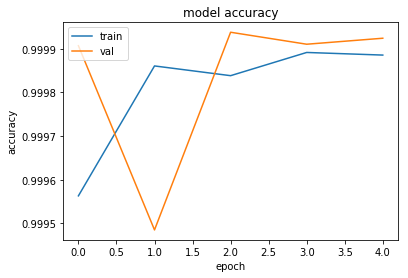

In [47]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

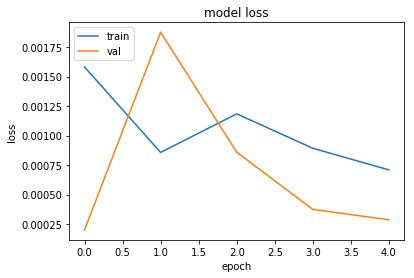

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
from keras.models import model_from_json
# serialize model to JSON
model_json = classifier.to_json()
with open("model_ANN.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model_ANN.h5")
print("Saved model to disk")

Saved model to disk


In [50]:
json_file = open('model_ANN.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_ANN.h5")
print("Loaded model from disk")

Loaded model from disk


In [51]:
loaded_model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [52]:
y_pred=loaded_model.predict(X_test)
y_pred =(y_pred>0.5)

In [53]:
test_loss, test_acc = loaded_model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

97054/97054 [==============================] - 2s 20us/step
test_acc:  0.9999244407221297


In [54]:
from sklearn.metrics import confusion_matrix
labels = [0, 1, 2]
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(le_name_mapping)
cmtx = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=labels), index=['neptune','normal','smurf'], columns=['neptune','normal','smurf'])
print(cmtx)

{'smurf': 2, 'normal': 1, 'neptune': 0}
         neptune  normal  smurf
neptune    21310       1      0
normal         1   19311      0
smurf          0       9  56422
